# [Mobile Phone Price Classification Project]

- 1. Libraries and Data Loading
- 2. Nan Value Checking
- 3. Outlier Checking and Handling
- 4. Check Correlation Beetween Independent and Dependent Feature
- 5. Visualization
- 6. Machine Learning Models
- 7. Model Evaluation
- 8. Model Selection

# Libraries and Data Loading

In [295]:
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
np.set_printoptions(threshold=sys.maxsize)

In [3]:
df = pd.read_csv("mobile-price-classification/mobile_price_classification.csv", header=0)


In [5]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


Columns

- battery_power: Total energy a battery can store in one time measured in mAh
- blue: Has bluetooth or not
- clock_speed: speed at which microprocessor executes instructions
- dual_sim: Has dual sim support or not
- fc: Front Camera mega pixels
- four_g: Has 4G or not
- int_memory: Internal Memory in Gigabytes
- m_dep: Mobile Depth in cm
- mobile_wt: Weight of mobile phone
- n_cores: Number of cores of processor
- pc: Primary Camera mega pixels
- px_height: Pixel Resolution Height
- px_width: Pixel Resolution Width
- ram: Random Access Memory in Mega Bytes
- sc_h: Screen Height of mobile in cm
- sc_w: Screen Width of mobile in cm
- talk_time: longest time that a single battery charge will last when you are
- three_g: Has 3G or not
- touch_screen: Has touch screen or not
- wifi: Has wifi or not
- price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

# Nan Value Checking

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


# Outliers Checking

In [36]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [347]:
sns.set(font_scale=7)
plt.figure(figsize =(80,550))

plt.subplot(14,3,1)
sns.boxplot(y=df['battery_power'])
plt.title('battery_power')

plt.subplot(14,3,2)
sns.boxplot(y=df['clock_speed'])
plt.title('clock_speed')

plt.subplot(14,3,3)
sns.boxplot(y=df['fc'])
plt.title('fc')

plt.subplot(14,3,4)
sns.boxplot(y=df['int_memory'])
plt.title('int_memory')

plt.subplot(14,3,5)
sns.boxplot(y=df['m_dep'])
plt.title('m_dep')

plt.subplot(14,3,6)
sns.boxplot(y=df['mobile_wt'])
plt.title('mobile_wt')

plt.subplot(14,3,7)
sns.boxplot(y=df['n_cores'])
plt.title('n_cores')

plt.subplot(14,3,8)
sns.boxplot(y=df['pc'])
plt.title('pc')

plt.subplot(14,3,9)
sns.boxplot(y=df['px_height'])
plt.title('px_height')

plt.subplot(14,3,10)
sns.boxplot(y=df['px_width'])
plt.title('px_width')

plt.subplot(14,3,11)
sns.boxplot(y=df['ram'])
plt.title('ram')

plt.subplot(14,3,12)
sns.boxplot(y=df['sc_h'])
plt.title('sc_h')

plt.subplot(14,3,13)
sns.boxplot(y=df['sc_w'])
plt.title('sc_w')

plt.subplot(14,3,14)
sns.boxplot(y=df['talk_time'])
plt.title('talk_time')


Text(0.5, 1.0, 'talk_time')

# Check Correlation Beetween Independent and Dependent Feature

Text(0.5, 1.0, 'Correlation ')

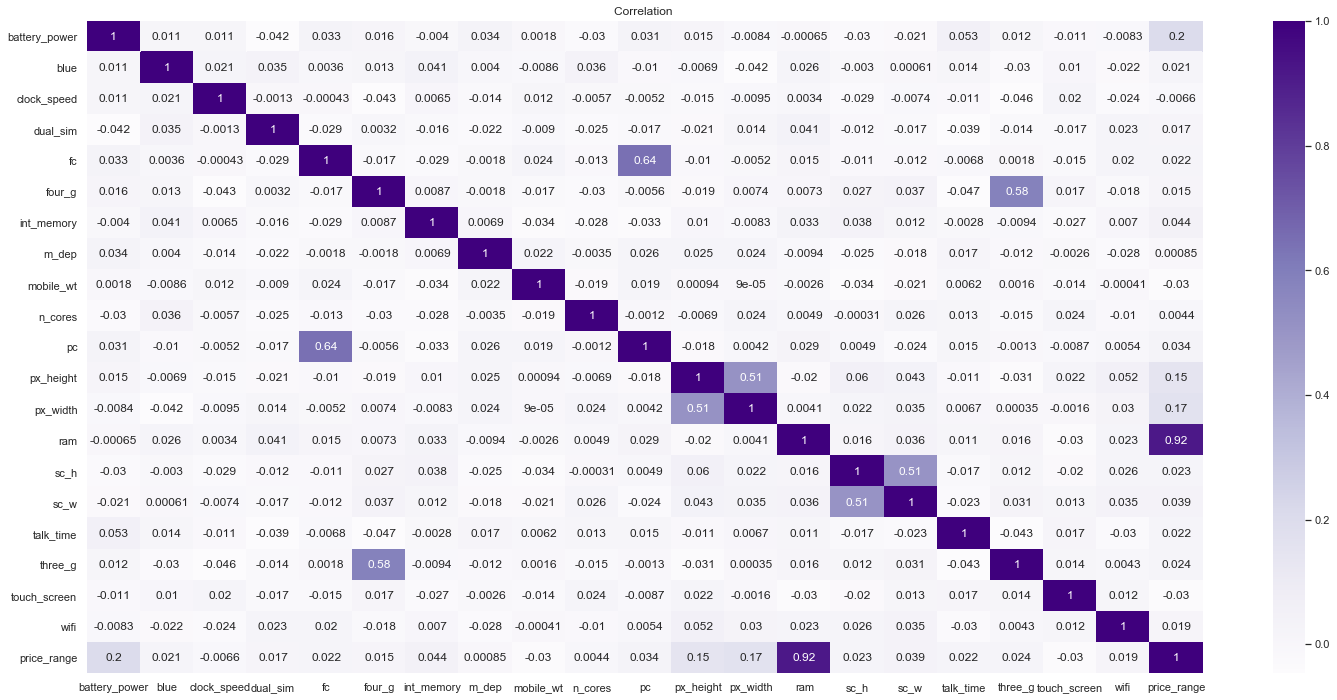

In [346]:
sns.set(font_scale=1)
fig = plt.figure(figsize=(25,12))
hp = sns.heatmap(df.corr('pearson'), annot=True, cmap='Purples')
hp.set_title("Correlation ")


# Visualization

In [149]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


Text(0.5, 1.0, 'Min')

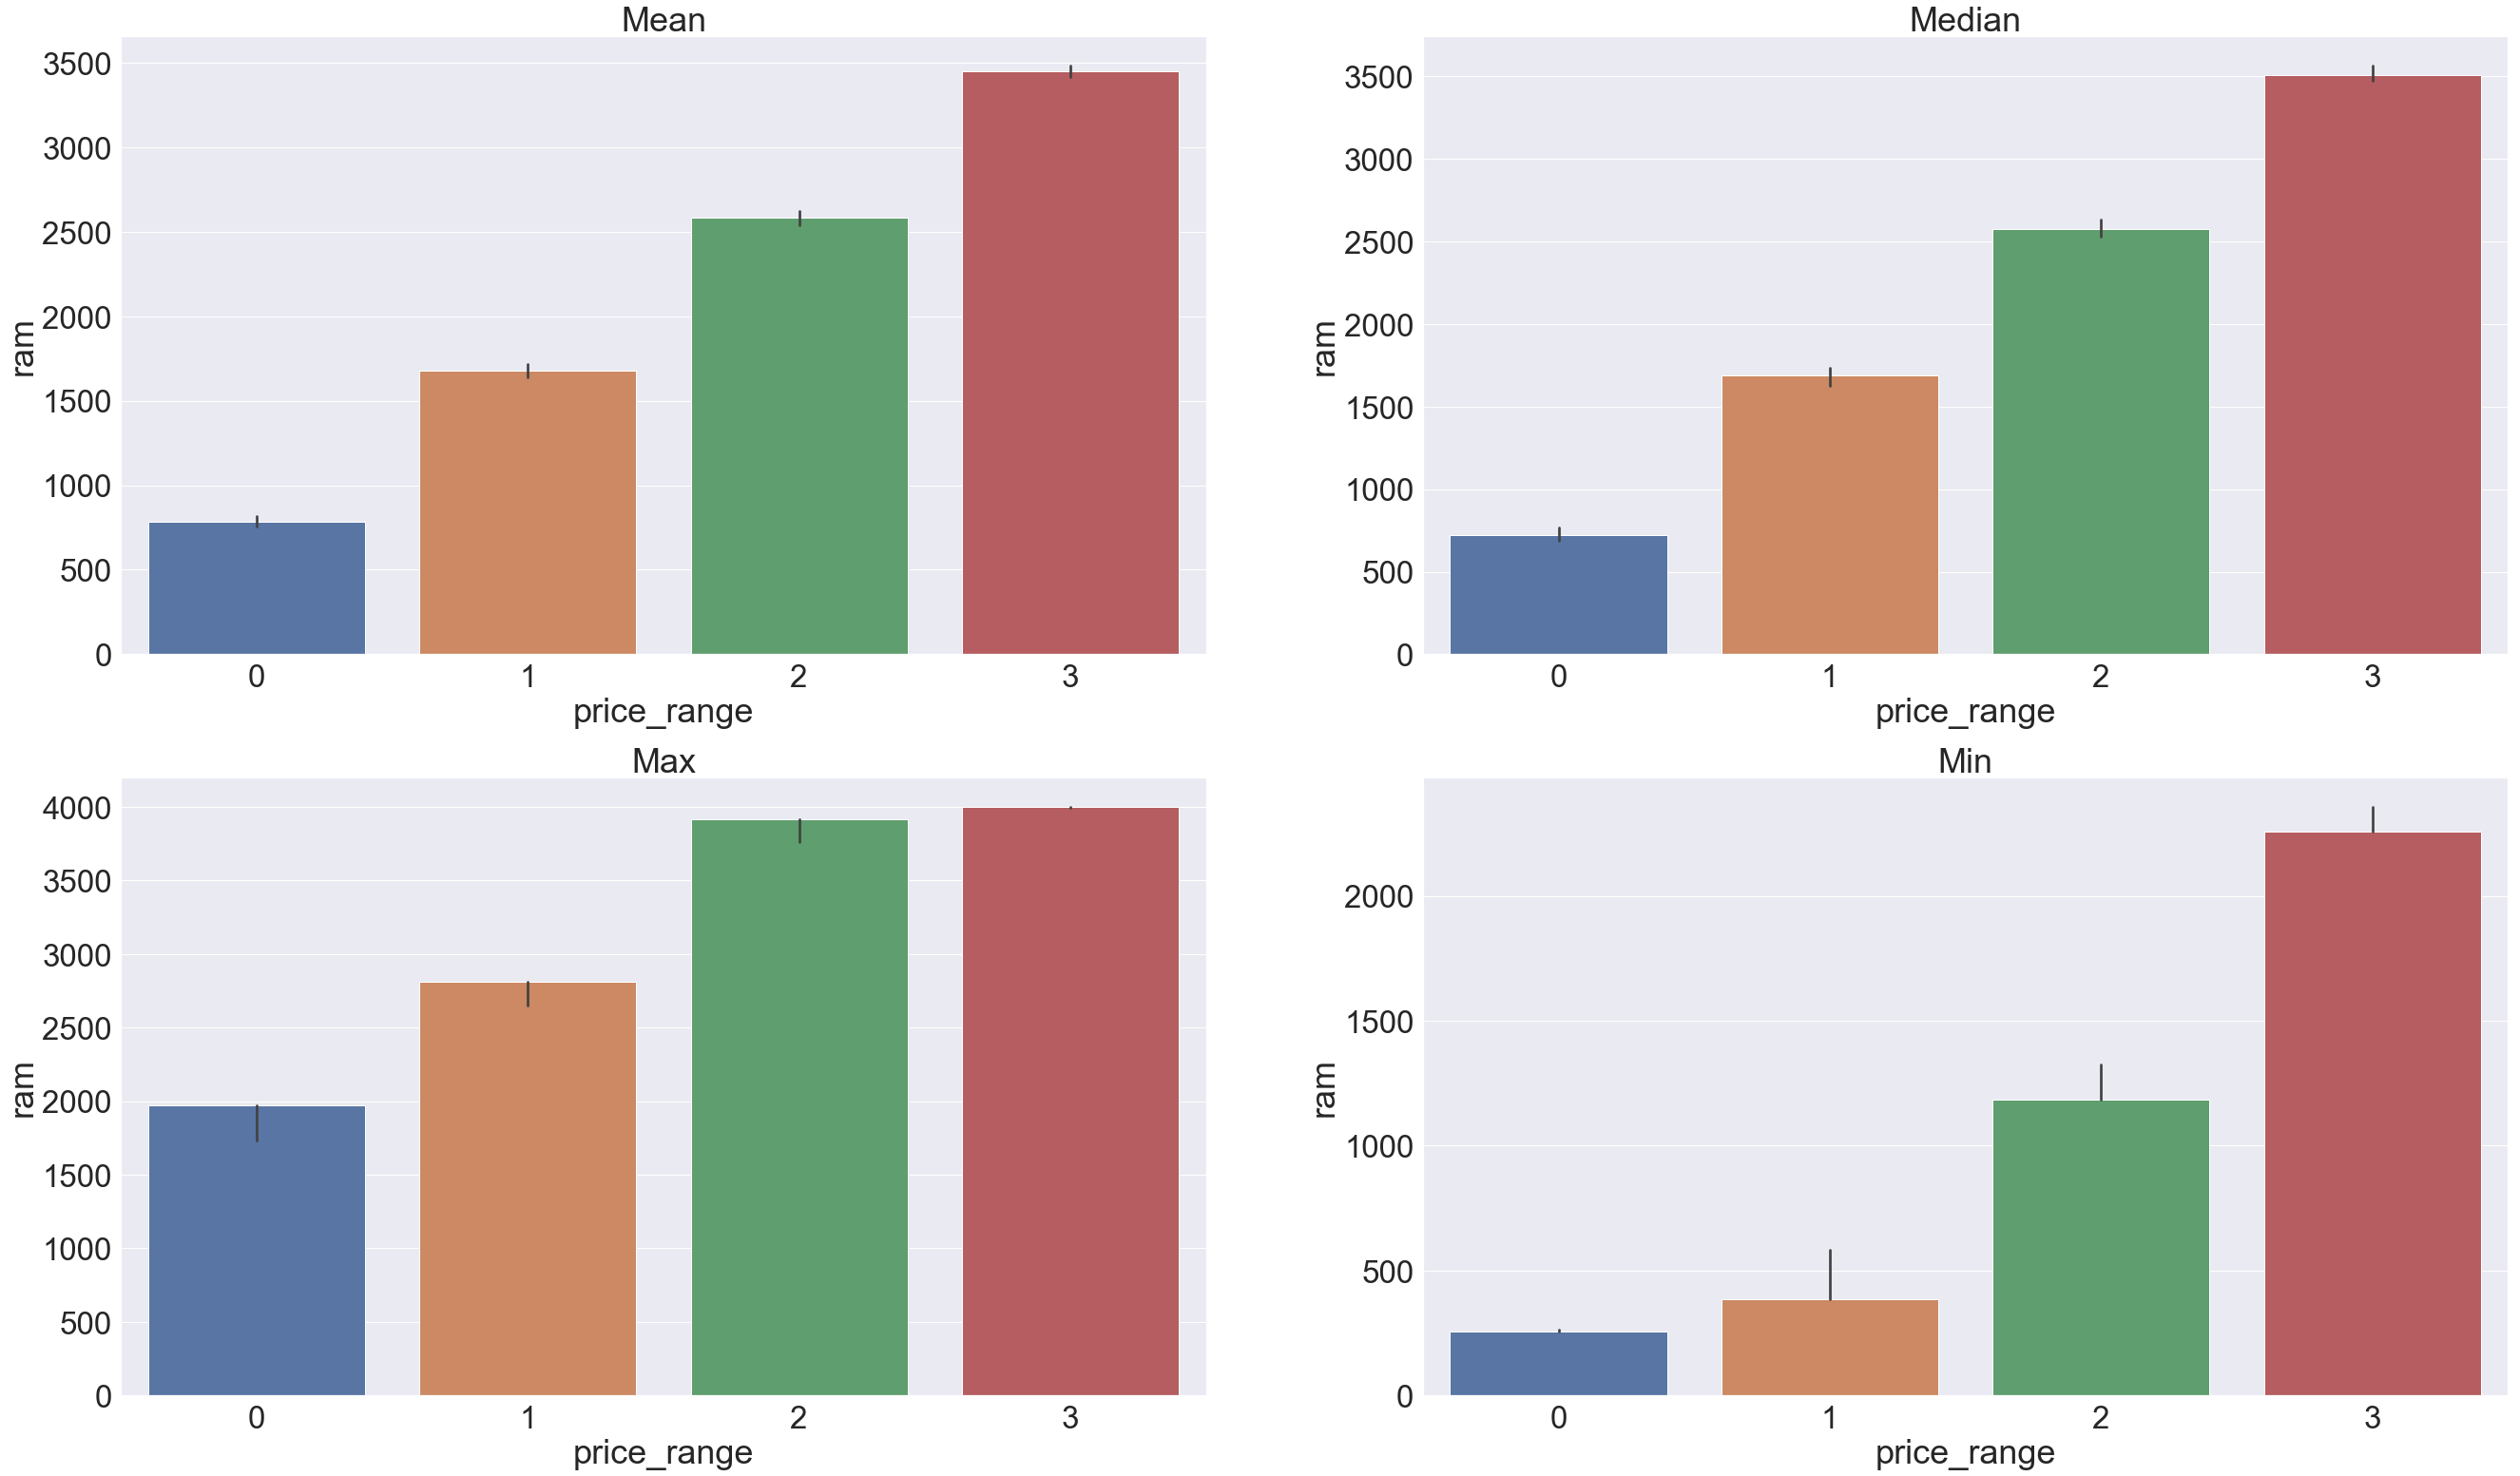

In [163]:
sns.set(font_scale=3)
plt.figure(figsize =(45,55))
plt.subplot(4,2,1)
sns.barplot(data = df, x = 'price_range', y ='ram', estimator = np.mean)
plt.title('Mean')

plt.subplot(4,2,2)
sns.barplot(data = df, x = 'price_range', y ='ram', estimator = np.median)
plt.title('Median')

plt.subplot(4,2,3)
sns.barplot(data = df, x = 'price_range', y ='ram', estimator = np.max)
plt.title('Max')

plt.subplot(4,2,4)
sns.barplot(data = df, x = 'price_range', y ='ram', estimator = np.min)
plt.title('Min')



Text(0.5, 1.0, 'Min')

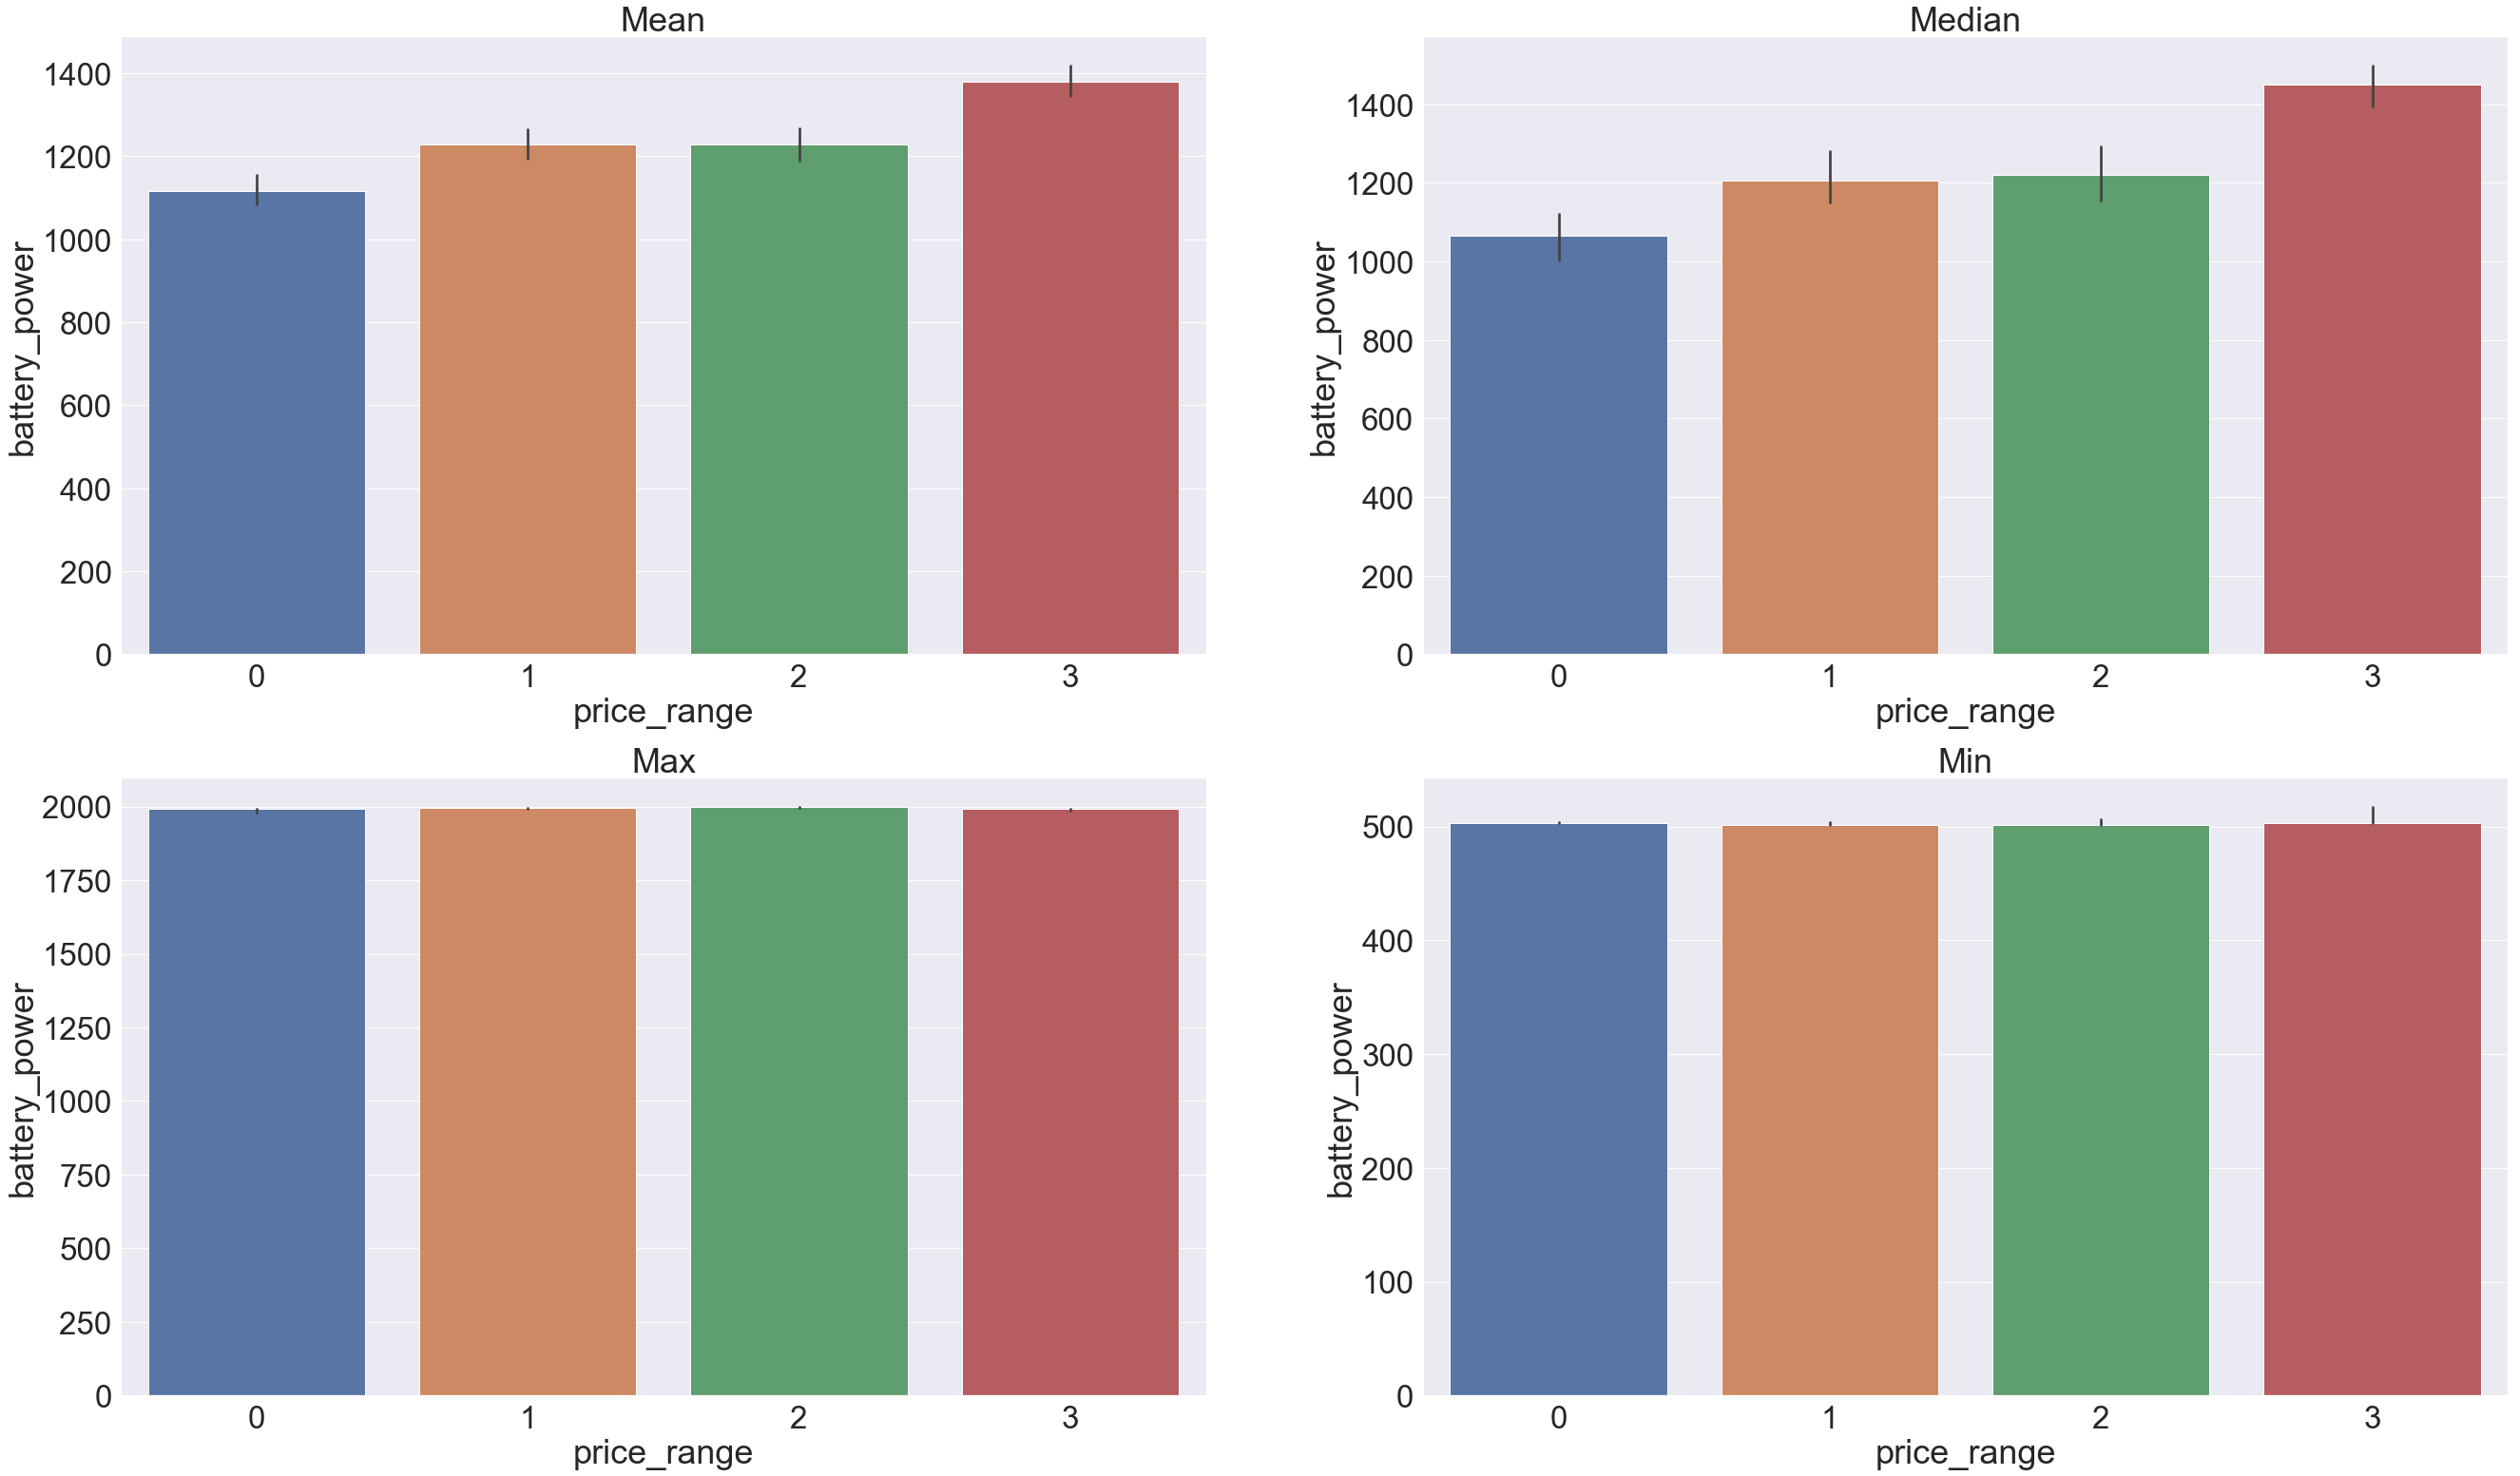

In [164]:
sns.set(font_scale=3)
plt.figure(figsize =(45,55))
plt.subplot(4,2,1)
sns.barplot(data = df, x = 'price_range', y ='battery_power', estimator = np.mean)
plt.title('Mean')

plt.subplot(4,2,2)
sns.barplot(data = df, x = 'price_range', y ='battery_power', estimator = np.median)
plt.title('Median')

plt.subplot(4,2,3)
sns.barplot(data = df, x = 'price_range', y ='battery_power', estimator = np.max)
plt.title('Max')

plt.subplot(4,2,4)
sns.barplot(data = df, x = 'price_range', y ='battery_power', estimator = np.min)
plt.title('Min')




Text(0.5, 1.0, 'Min')

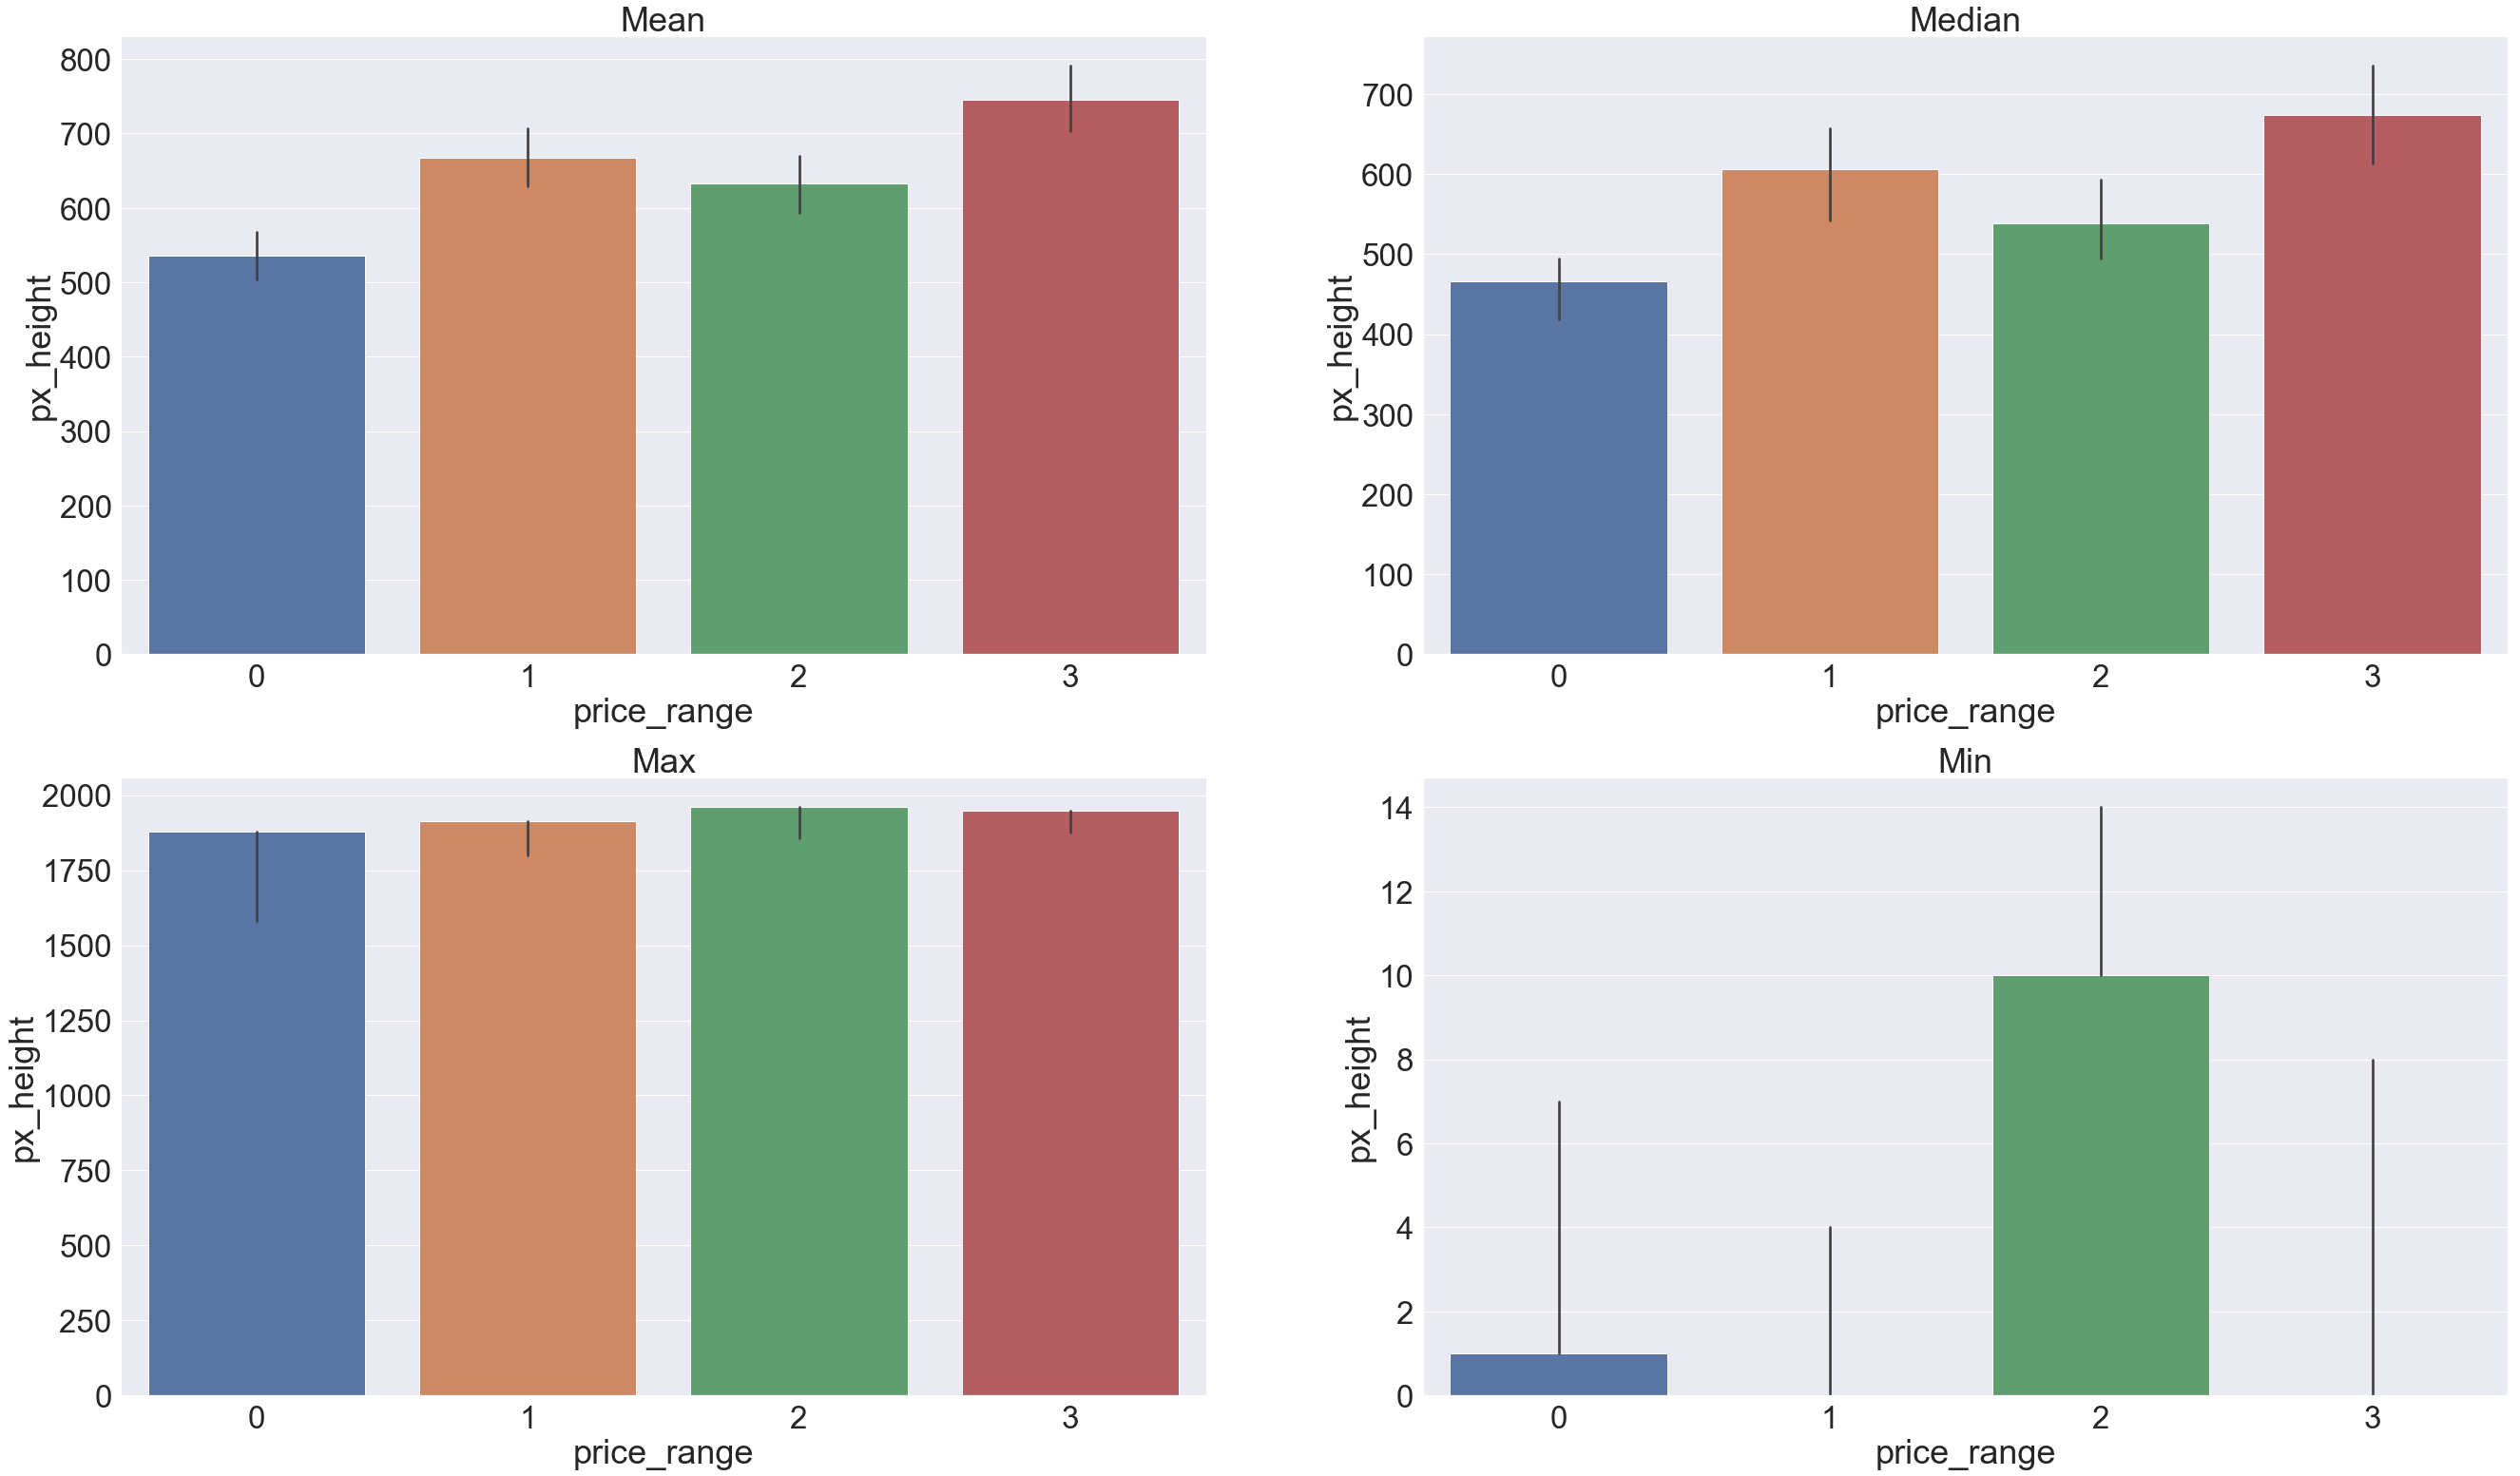

In [165]:
sns.set(font_scale=3)
plt.figure(figsize =(45,55))
plt.subplot(4,2,1)
sns.barplot(data = df, x = 'price_range', y ='px_height', estimator = np.mean)
plt.title('Mean')

plt.subplot(4,2,2)
sns.barplot(data = df, x = 'price_range', y ='px_height', estimator = np.median)
plt.title('Median')

plt.subplot(4,2,3)
sns.barplot(data = df, x = 'price_range', y ='px_height', estimator = np.max)
plt.title('Max')

plt.subplot(4,2,4)
sns.barplot(data = df, x = 'price_range', y ='px_height', estimator = np.min)
plt.title('Min')




Text(0.5, 1.0, 'Min')

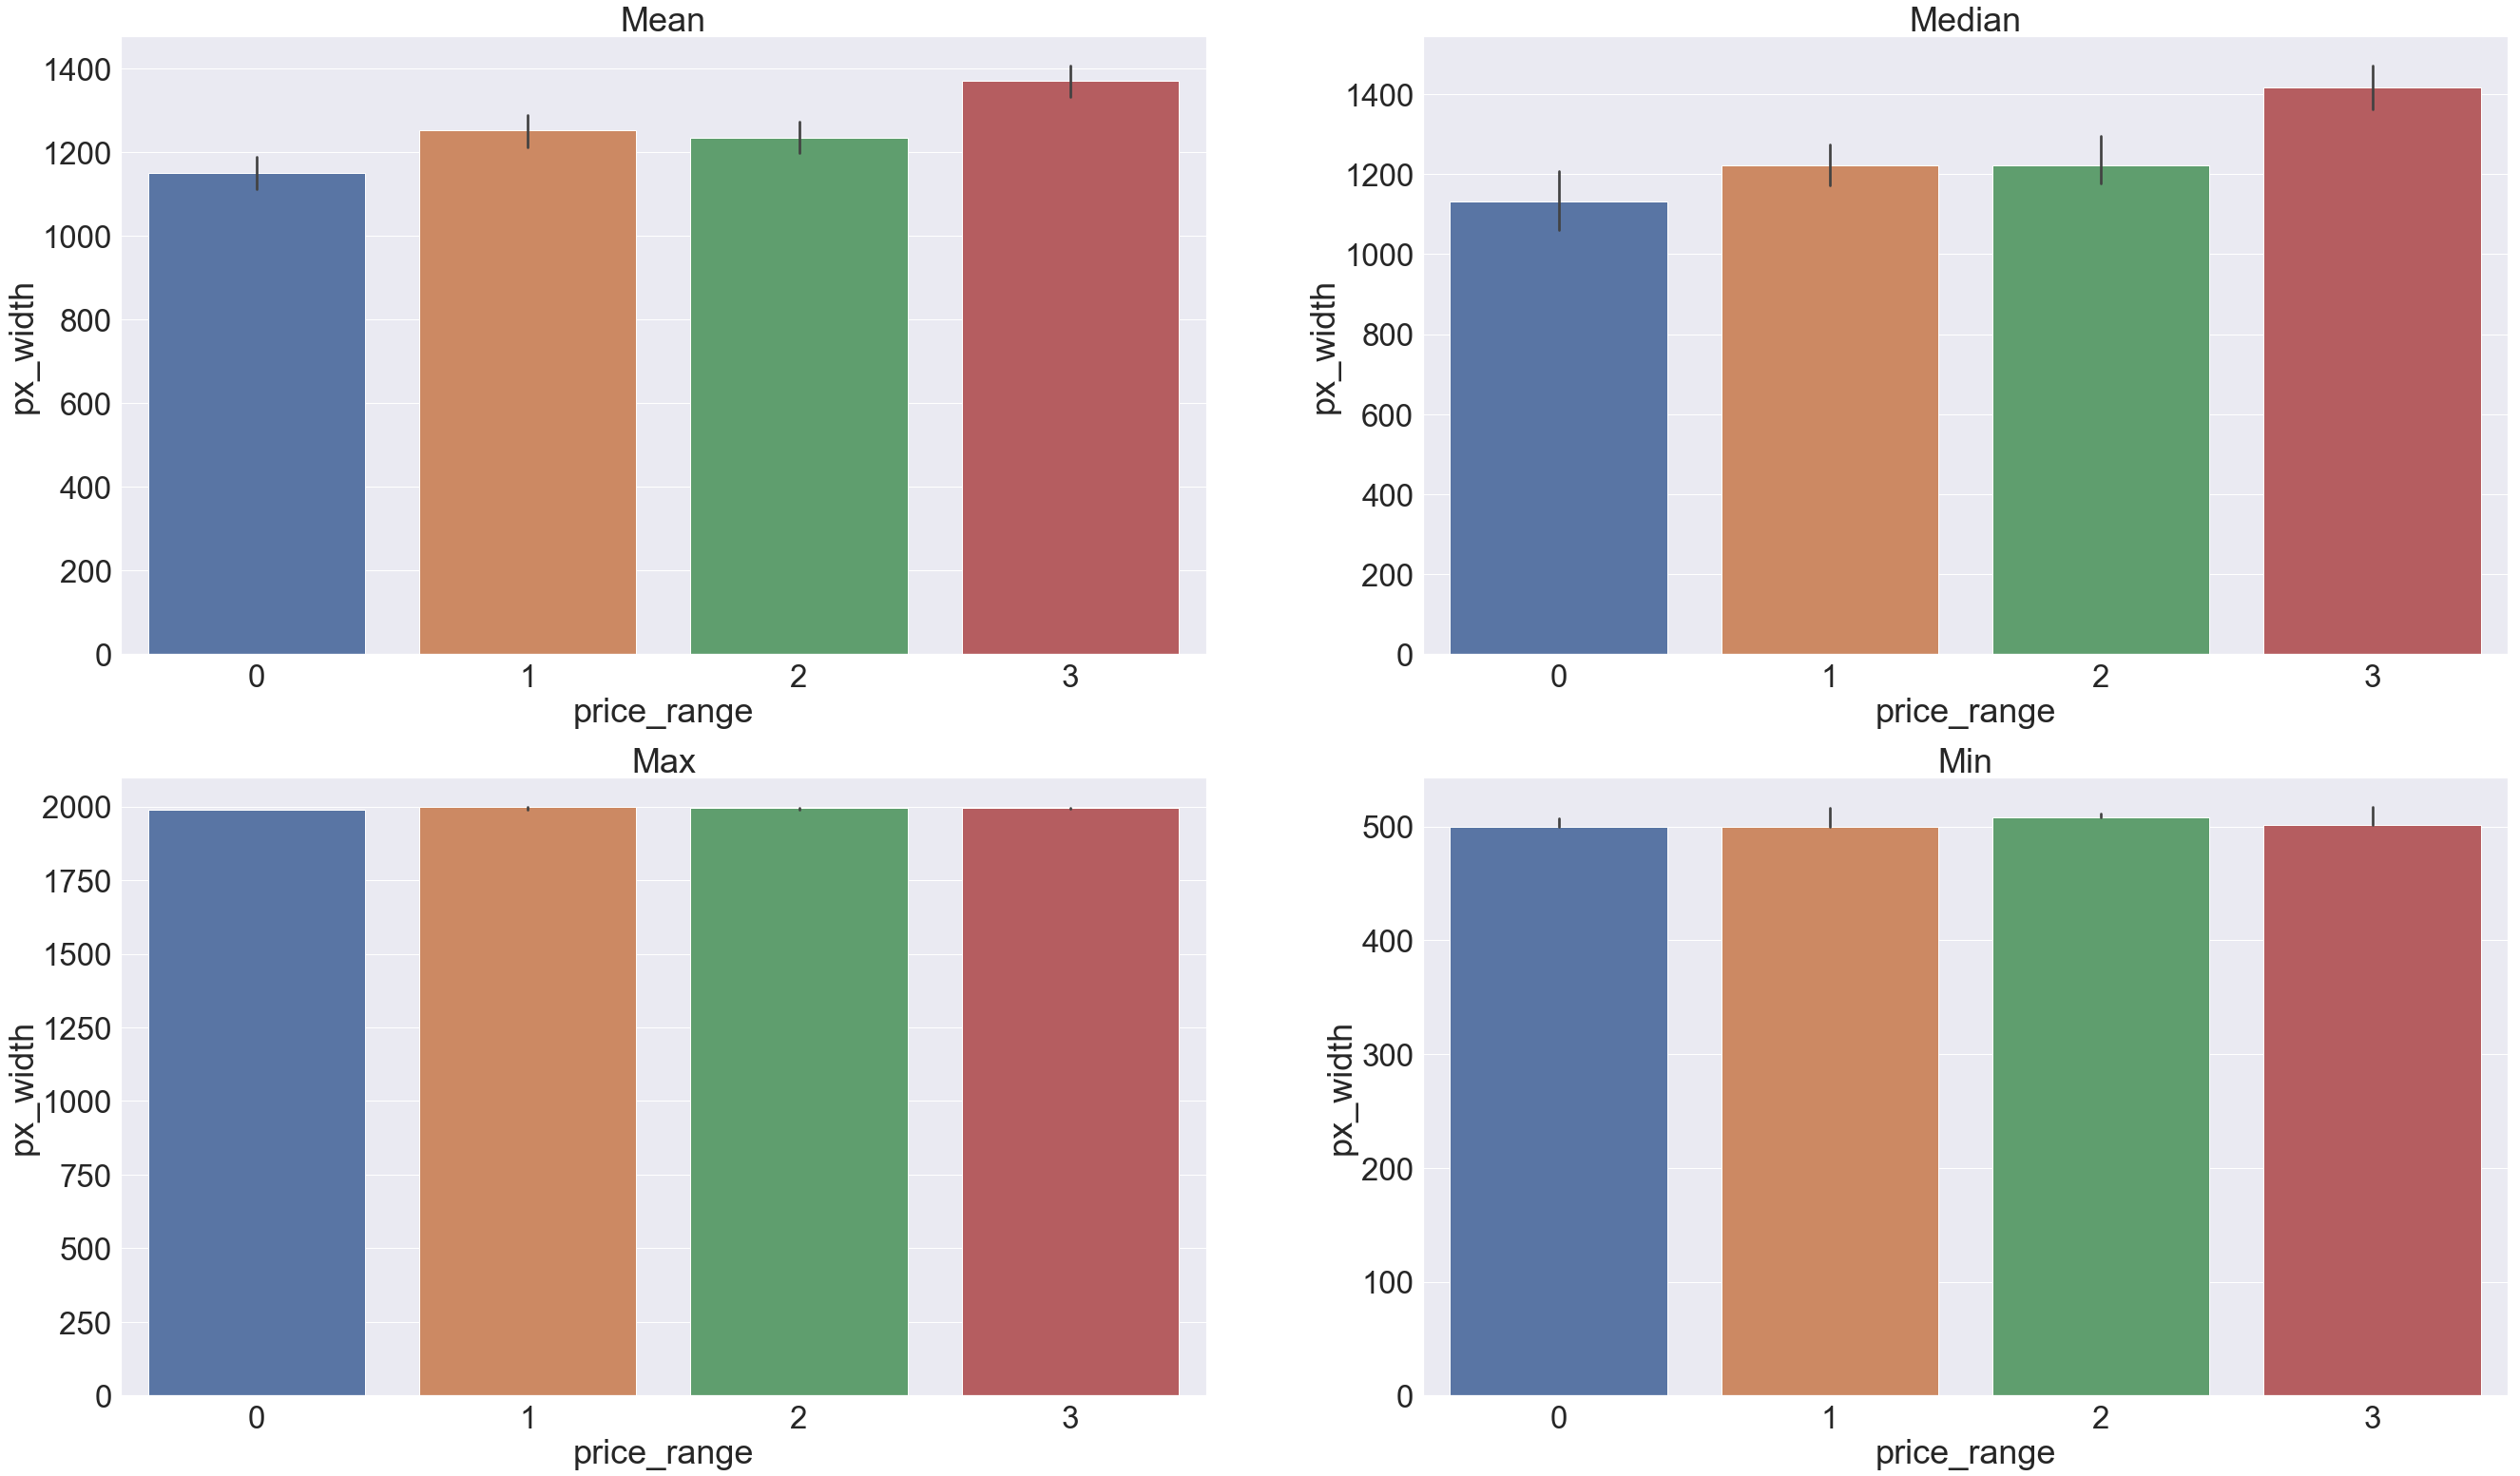

In [166]:
sns.set(font_scale=3)
plt.figure(figsize =(45,55))
plt.subplot(4,2,1)
sns.barplot(data = df, x = 'price_range', y ='px_width', estimator = np.mean)
plt.title('Mean')

plt.subplot(4,2,2)
sns.barplot(data = df, x = 'price_range', y ='px_width', estimator = np.median)
plt.title('Median')

plt.subplot(4,2,3)
sns.barplot(data = df, x = 'price_range', y ='px_width', estimator = np.max)
plt.title('Max')

plt.subplot(4,2,4)
sns.barplot(data = df, x = 'price_range', y ='px_width', estimator = np.min)
plt.title('Min')




In [173]:
df[df['price_range'] == 3]['px_width'].min()

501

# Machine Learning Models

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X = df.loc[:,df.columns != 'price_range']
y = df['price_range']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)


In [100]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import StackingClassifier

In [144]:
svc = svm.SVC(kernel='linear', C=0.01)
rfc = RandomForestClassifier()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
adb = AdaBoostClassifier()

estimators = [('svc',svm.SVC(kernel='linear', C=0.01)),('rfc',RandomForestClassifier()),
              ('gbc',GradientBoostingClassifier()),('xgb',XGBClassifier()),
              ('adb',AdaBoostClassifier())]

stck = StackingClassifier(estimators=estimators,
                        final_estimator=svm.SVC(kernel='linear', C=0.01))

# estimators = [('rfc',RandomForestClassifier()),
#               ('gbc',GradientBoostingClassifier()),('xgb',XGBClassifier()),
#               ('adb',AdaBoostClassifier())]

# stck = StackingClassifier(estimators=estimators,
#                         final_estimator=RandomForestClassifier(n_estimators=10,
#                                                               random_state=42))



svc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
xgb.fit(X_train, y_train)
gbc.fit(X_train, y_train)
adb.fit(X_train, y_train)
stck.fit(X_train, y_train)

print('')

In [145]:
from sklearn import model_selection

for clf, label in zip([svc,rfc,gbc,xgb,adb], ['svc','rfc','gbc','xgb','adb']):
    scores = model_selection.cross_val_score(clf,X,y,cv=3, scoring='f1_macro')
    
    print('F1 Scores: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), label))
#     print(scores.mean(), scores.std(), label)
#     print(scores)



F1 Scores: 0.98 (+/- 0.00) [svc]
F1 Scores: 0.87 (+/- 0.01) [rfc]
F1 Scores: 0.90 (+/- 0.01) [gbc]
F1 Scores: 0.91 (+/- 0.00) [xgb]
F1 Scores: 0.70 (+/- 0.02) [adb]


In [146]:
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)
y_test_pred_rfc = rfc.predict(X_test)
y_test_pred_xgb = xgb.predict(X_test)
y_test_pred_gbc = xgb.predict(X_test)
y_test_pred_adb = adb.predict(X_test)

y_test_pred_stck = stck.predict(X_test)

# Model Evaluation

In [147]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, matthews_corrcoef,auc,log_loss


In [148]:
print('Support Vector Classifier')
print(classification_report(y_test,y_test_pred))
# confusion_matrix
print('')
print('Stacking Classifier')
print(classification_report(y_test,y_test_pred_stck))
print('')
print('Random Forrest Classifier')
print(classification_report(y_test,y_test_pred_rfr))
print('')
print('XGBoost Classifier')
print(classification_report(y_test,y_test_pred_xgb))
print('')
print('Gradient Boost Classifier')
print(classification_report(y_test,y_test_pred_gbc))
print('')
print('Ada Boost Classifier')
print(classification_report(y_test,y_test_pred_adb))
print('')

Support Vector Classifier
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        95
           1       0.95      0.98      0.96        92
           2       0.96      0.95      0.95        99
           3       0.99      0.97      0.98       114

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400


Stacking Classifier
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        95
           1       0.95      0.98      0.96        92
           2       0.96      0.95      0.95        99
           3       0.99      0.97      0.98       114

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400


Random Forrest Classifier
              precision    recall  f1-score   support

 

In [174]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef, roc_auc_score, log_loss, f1_score
from sklearn.model_selection import KFold


In [175]:
kF = KFold(n_splits = 5, shuffle = True)

In [260]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    matt = matthews_corrcoef(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    report = classification_report(y_train, predictions)
#     roc_auc = roc_auc_score(y_train, predictProba[:,1], multi_class="ovo")
    accuracy = accuracy_score(y_train, predictions)
    confMatrix = confusion_matrix(y_train, predictions)
    logloss = log_loss(y_train,predictProba)
    return { 
        'report': report, 
        'matthew': matt, 
        'f1' : f1, 
#         'roc': roc_auc, 
        'accuracy': accuracy,
        'confusion': confMatrix,
        'logloss': logloss
    }
    
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    matt = matthews_corrcoef(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    report = classification_report(y_test, predictions)
#     roc_auc = roc_auc_score(y_test, predictProba[:,1], multi_class="ovr")
    accuracy = accuracy_score(y_test, predictions)
    confMatrix = confusion_matrix(y_test, predictions)
    logloss = log_loss(y_test, predictProba)
    return { 
        'report': report, 
        'matthew': matt, 
        'f1' : f1, 
#         'roc': roc_auc, 
        'accuracy': accuracy,
        'confusion': confMatrix,
        'logloss': logloss
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the classification metrics for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [338]:
# # tri = []
# # vali = 0
# # for train_index, val_index, in kF.split(X, y):
# #     print(val_index)
# #     tri.append(val_index)
    
    
# # # train_index
# # len(tri)
# # # len(train_index)
# model = svm.SVC(kernel='linear', C=0.01, probability=True) 
# model.fit(X_train, y_train)   
# model.predict_proba(X_test)
# model.predict(X_test)
# # df['price_range']

In [262]:
train_errors = []
validation_errors = []
for train_index, val_index, in kF.split(X, y):
    
    # split data
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # instantiate model
    logmodel = svm.SVC(kernel='linear', C=0.01, probability=True)
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, logmodel)
    
    # append to appropirate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [264]:
listItem = []
listIndex = []

for i,tr,val in zip(range(1,len(train_errors)+1),train_errors,validation_errors) :
#     listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],
    listItem.append([tr['accuracy'],val['accuracy'],tr['f1'],
                     val['f1'],tr['matthew'],val['matthew'],tr['logloss'],val['logloss']])
    listIndex.append('{} Iteration'.format(i))

listItem.append(list(np.mean(listItem,axis=0)))
listIndex.append('Average')
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
#                             'Train ROC AUC', 
#                             'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Matthews Corr Coef',
                            'Test Matthews Corr Coef',
                            'Train Log Loss',
                            'Test Log Loss'],
                    index=listIndex)
dfEvaluate

,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score,Train Matthews Corr Coef,Test Matthews Corr Coef,Train Log Loss,Test Log Loss
1 Iteration,0.98875,0.9625,0.988772,0.962292,0.985000,0.950092,0.061646,0.095037
2 Iteration,0.98875,0.9750,0.988680,0.975081,0.985007,0.966750,0.060891,0.079768
3 Iteration,0.98625,0.9825,0.986250,0.982563,0.981668,0.976781,0.073556,0.078919
4 Iteration,0.98625,0.9850,0.986326,0.984448,0.981670,0.980164,0.070683,0.066853
5 Iteration,0.98250,0.9875,0.982534,0.987495,0.976685,0.983439,0.070859,0.056986
Average,0.98650,0.9785,0.986512,0.978376,0.982006,0.971445,0.067527,0.075513


In [345]:
# listItem = []
# listIndex = []
# trr = []
# vall = []

# for i,tr,val in zip(range(1,len(train_errors)+1),train_errors,validation_errors) :
# #     listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],
#     listItem.append([tr['accuracy'],val['accuracy'],tr['f1'],
#                      val['f1'],tr['matthew'],val['matthew'],tr['logloss'],val['logloss']])
#     listIndex.append('{} Iteration'.format(i))
#     trr.append(tr)
#     vall.append(val)

# listItem.append(list(np.mean(listItem,axis=0)))
# # listIndex.append('Average')
    
# # dfEvaluate = pd.DataFrame(listItem, 
# #                     columns=['Train Accuracy', 
# #                             'Test Accuracy', 
# # #                             'Train ROC AUC', 
# # #                             'Test ROC AUC', 
# #                             'Train F1 Score',
# #                             'Test F1 Score',
# #                             'Train Matthews Corr Coef',
# #                             'Test Matthews Corr Coef',
# #                             'Train Log Loss',
# #                             'Test Log Loss'],
# #                     index=listIndex)
# # dfEvaluate
# listItem
# # trr[1]['accuracy']
# # vall
# # train_errors
# # # range(1,len(train_errors)+1)
# # list(np.mean(listItem,axis=0))
# # list(np.mean([[2,2,3],[3,3,3]], axis=0))
# # # np.mean([[2,2,3],[3,3,3]])
# # train_index
# # kF.split(X, y)
# # val_index


In [265]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

<Figure size 3240x3960 with 0 Axes>

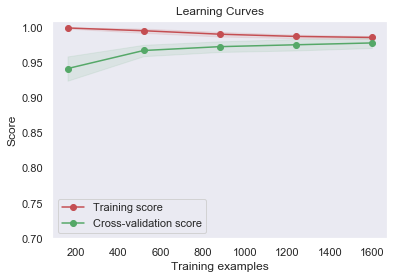

In [268]:
sns.set(font_scale=1)
plt.figure(figsize =(45,55))

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt




title = "Learning Curves"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

# estimator = XGBClassifier()
estimator = svm.SVC(kernel='linear', C=0.01)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)


plt.show()